California Causes of Death
========================
Using the CDC wonder dataset on the causes of death by month for the state of California

Question to answer: Are Diseases of the heart Periodic?

In [297]:
%matplotlib inline

from collections import defaultdict
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

First load in the data and get a look at the first 5 columns and structure of it. Note that the data file is tab delimited and the last 54 lines containes meta data. Also not all causes have a death in every month. 

In [298]:
df = pd.read_csv('ucdMonthICD10-113.txt',engine='python', sep="\t", skipfooter=54)
df.head()

,Notes,Month,Month Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,NaN,"Jan., 1999",1999/01,"Certain other intestinal infections (A04,A07-A09)",GR113-003,19,Not Applicable,Not Applicable
1,NaN,"Jan., 1999",1999/01,#Tuberculosis (A16-A19),GR113-004,14,Not Applicable,Not Applicable
2,NaN,"Jan., 1999",1999/01,Respiratory tuberculosis (A16),GR113-005,12,Not Applicable,Not Applicable
3,NaN,"Jan., 1999",1999/01,#Septicemia (A40-A41),GR113-010,72,Not Applicable,Not Applicable
4,NaN,"Jan., 1999",1999/01,#Viral hepatitis (B15-B19),GR113-015,87,Not Applicable,Not Applicable


Mapping each of the codes to list of indexes is useful. 

In [299]:
def makeCauseMap(df):
    d = defaultdict(list)
    for index, cause in df['ICD-10 113 Cause List Code'].iteritems():
        d[cause].append(index)
    return d

causes = makeCauseMap(df)


A map from code to cause description will also be useful

In [300]:
codeD = {}
for key in causes:
    codeD[key] = df.loc[causes[key][0]]['ICD-10 113 Cause List']

codeD

{'GR113-003': 'Certain other intestinal infections (A04,A07-A09)',
 'GR113-004': '#Tuberculosis (A16-A19)',
 'GR113-005': 'Respiratory tuberculosis (A16)',
 'GR113-010': '#Septicemia (A40-A41)',
 'GR113-015': '#Viral hepatitis (B15-B19)',
 'GR113-016': '#Human immunodeficiency virus (HIV) disease (B20-B24)',
 'GR113-018': 'Other and unspecified infectious and parasitic diseases and their sequelae (A00,A05,A20-A36,A42-A44,A48-A49,A54-A79,A81-A82,A85.0-A85.1,A85.8,A86-B04,B06-B09,B25-B49,B55-B99)',
 'GR113-019': '#Malignant neoplasms (C00-C97)',
 'GR113-020': 'Malignant neoplasms of lip, oral cavity and pharynx (C00-C14)',
 'GR113-021': 'Malignant neoplasm of esophagus (C15)',
 'GR113-022': 'Malignant neoplasm of stomach (C16)',
 'GR113-023': 'Malignant neoplasms of colon, rectum and anus (C18-C21)',
 'GR113-024': 'Malignant neoplasms of liver and intrahepatic bile ducts (C22)',
 'GR113-025': 'Malignant neoplasm of pancreas (C25)',
 'GR113-026': 'Malignant neoplasm of larynx (C32)',
 'GR

In [301]:
maxCode = df.loc[df.Deaths.idxmax()]['ICD-10 113 Cause List Code']
maxIndexs = causes[maxCode][-12:]
df.loc[maxIndexs]

,Notes,Month,Month Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
19287,NaN,"Jan., 2015",2015/01,Major cardiovascular diseases (I00-I78),GR113-053,8532,Not Applicable,Not Applicable
19388,NaN,"Feb., 2015",2015/02,Major cardiovascular diseases (I00-I78),GR113-053,7055,Not Applicable,Not Applicable
19489,NaN,"Mar., 2015",2015/03,Major cardiovascular diseases (I00-I78),GR113-053,7407,Not Applicable,Not Applicable
19592,NaN,"Apr., 2015",2015/04,Major cardiovascular diseases (I00-I78),GR113-053,6871,Not Applicable,Not Applicable
19693,NaN,"May, 2015",2015/05,Major cardiovascular diseases (I00-I78),GR113-053,7045,Not Applicable,Not Applicable
19790,NaN,"Jun., 2015",2015/06,Major cardiovascular diseases (I00-I78),GR113-053,6545,Not Applicable,Not Applicable
19889,NaN,"Jul., 2015",2015/07,Major cardiovascular diseases (I00-I78),GR113-053,6422,Not Applicable,Not Applicable
19988,NaN,"Aug., 2015",2015/08,Major cardiovascular diseases (I00-I78),GR113-053,6462,Not Applicable,Not Applicable
20086,NaN,"Sep., 2015",2015/09,Major cardiovascular diseases (I00-I78),GR113-053,6185,Not Applicable,Not Applicable
20182,NaN,"Oct., 2015",2015/10,Major cardiovascular diseases (I00-I78),GR113-053,6517,Not Applicable,Not Applicable


Need to extract from pandas the ts, xs to do work on.

In [302]:
import re
def getMonth(timeStr):
    result = re.match(r"([0-9]+)/([0-9]+)", timeStr)
    if result:
        year, month = result.group(1, 2)
        return int(year), int(month)
    return 0,0

def nextMonth(timeStr):
    year,month = getMonth(timeStr)
    if month == 12:
        year+=1
        month = 1
    else:
        month+=1
    return int(year), int(month)
    
def createTseries2(df, indexs):
    ts = []
    vals = []
    preyear = 1999
    premonth = 1
    for index, time in df.loc[indexs]['Month Code'].iteritems():
        year, month = getMonth(time)
        while(preyear != year or premonth != month):
                ts.append(str(preyear)+'/'+str(premonth))
                vals.append(0)
                preyear, premonth = nextMonth(str(preyear)+'/'+str(premonth))     
        ts.append(time)
        vals.append(df.loc[index].Deaths)
        preyear, premonth = nextMonth(str(preyear)+'/'+str(premonth))
    
    if preyear != 2016 and premonth !=1:
        year=2016
        month=1
        while(preyear != year or premonth != month):
            ts.append(str(preyear)+'/'+str(premonth))
            vals.append(0)
            preyear, premonth = nextMonth(str(preyear)+'/'+str(premonth))
    return (ts, vals)

tseries2 = createTseries2(df, causes['GR113-004'])

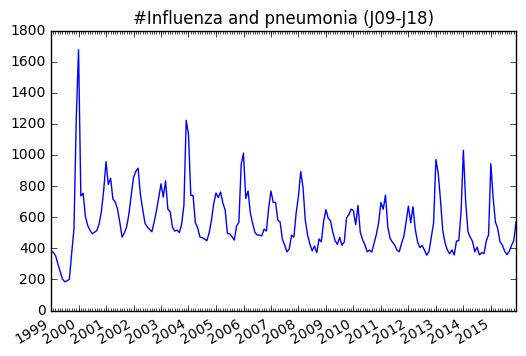

In [303]:
#Function that makes a time series plot
def makeTplot(df, ICDcode):
    years = mdates.YearLocator() 
    months = mdates.MonthLocator()
    yearsFmt = mdates.DateFormatter('%Y')

    indexs = causes[ICDcode]
    
    tseriesAll = createTseries2(df.loc[indexs], indexs)
    
    if len(tseriesAll[0]) != 204:
        return
    tstart = datetime.date(1999, 1, 1)
    tstop = datetime.date(2015, 12, 1)
    diff = (tstop-tstart).total_seconds()
    delta = np.floor(diff/float(len(tseriesAll[1])-1))
    ts = mdates.drange(tstart, tstop, datetime.timedelta(seconds = delta))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(ts, tseriesAll[1])
    
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    
#     title = df.loc[indexs[0]]['ICD-10 113 Cause List']
    title = codeD[ICDcode]
    if len(title) > 45:
        title = title[:45]+'...'
    ax.set_title(title)
    
    ax.set_xlim(tstart, tstop)
    ax.format_xdata = mdates.DateFormatter('%Y-%m')
    fig.autofmt_xdate()
    plt.show()

makeTplot(df, 'GR113-076')

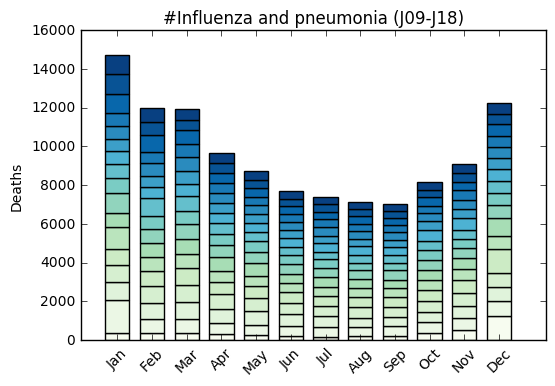

In [304]:
#function that organizes the data by months and plots a stacked bar chart
def createMonthChart(df, code):
    inf_pnu_tsxs = createTseries2(df, causes[code])
    ts = inf_pnu_tsxs[0]
    xs = inf_pnu_tsxs[1]
    colors = plt.cm.GnBu(np.linspace(0, 1, 17))
    num_years = 17
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ind = np.arange(12)
    width = 0.7
    rects1 = ax.bar(ind, xs[0:12], width, color = colors[0])
    y_offset=np.array(xs[0:12])
    for i in range(1, num_years):
        rects1 = ax.bar(ind, xs[i*12:(i+1)*12], width, bottom=y_offset, color=colors[(i)%len(colors)])
        y_offset+=xs[i*12:(i+1)*12]

    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylabel('Deaths')
    
    title = codeD[code]
    if len(title) > 45:
        title = title[:45]+'...'
    ax.set_title(title)
    
    xTickMarks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticks(ind+width/2)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=45, fontsize=10)
    plt.show()

createMonthChart(df, 'GR113-076')

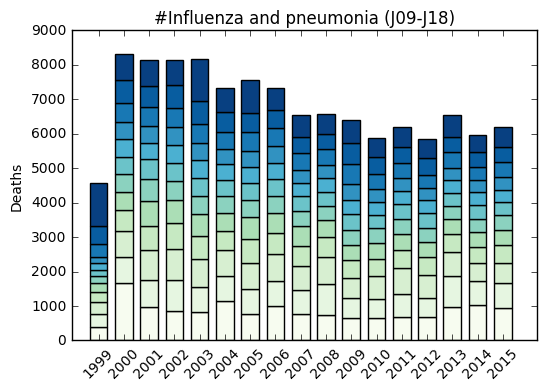

In [305]:
#year to year changes in data
def createYearChart(df, code):
    inf_pnu_tsxs = createTseries2(df, causes[code])
    ts = inf_pnu_tsxs[0]
    xs = inf_pnu_tsxs[1]
    colors = plt.cm.GnBu(np.linspace(0, 1, 12))
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ind = np.arange(17)
    width = 0.7
    rects1 = ax.bar(ind, xs[0::12], width, color = colors[0])
    y_offset=np.array(xs[0::12])
    for i in range(1, 12):
        rects1 = ax.bar(ind, xs[i::12], width, bottom=y_offset, color=colors[i%len(colors)])
        y_offset+=xs[i::12]

    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylabel('Deaths')
    
    title = codeD[code]
    if len(title) > 45:
        title = title[:45]+'...'
    ax.set_title(title)
    
    xTickMarks = range(1999, 2016)
    ax.set_xticks(ind+width/2)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=45, fontsize=10)
    plt.show()

createYearChart(df, 'GR113-076')


Spectrums are useful for seing the frequency composition of time series data. To examine if deaths from heart disease have a period of one year we can look for a peak at that frequency. The power spectral density accentuates peaks more, so if the data is periodic over a year it should stand out more.

Influenza and pnuemonia are diseases that have known periodicity, which is why I have been using it for testing plots.

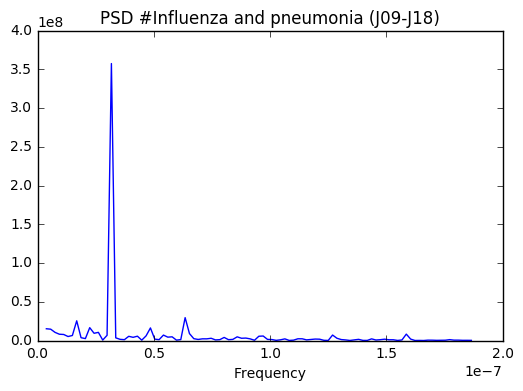

365.0 days


365.0

In [306]:
#creates a PSD of the data
def PSDplot(df, code):
    inf_pnu_tsxs = createTseries2(df, causes[code])
    ts = inf_pnu_tsxs[0]
    xs = inf_pnu_tsxs[1]
    #Sampling Period = 1 month, so sampling freq = 1 sample / 1 month = 1 sample / 2.628e+6 s
    Fs= 1/2.628e6

    fsh = Fs*np.arange((len(ts)-1)/2)/len(ts)
    ps = np.fft.fft(np.array(xs))
    ps2 = ps[0:(len(ps)-1)/2]*ps[0:(len(ps)-1)/2]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    title = codeD[code]
    if len(title) > 40:
        title = title[:40]+'...'
    title = "PSD "+title
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    plt.plot(fsh[2:], abs(ps2[2:])) #because dc offset is really large
    plt.show()

    ind = np.argmax(ps2[1:])
    
    maxT = (1/fsh[1+ind])/60/60/24
    print(str((1/fsh[1+ind])/60/60/24)+" days")
    if maxT == 365:
        return maxT
    else:
        return 0

PSDplot(df, 'GR113-076')

GR113-053


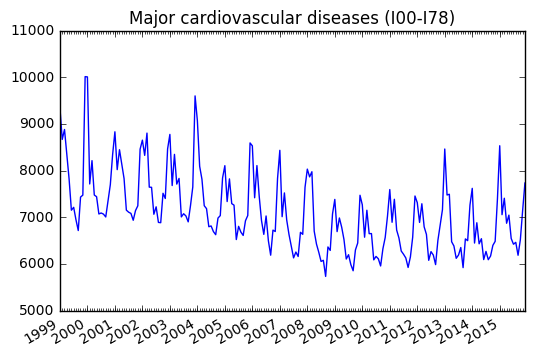

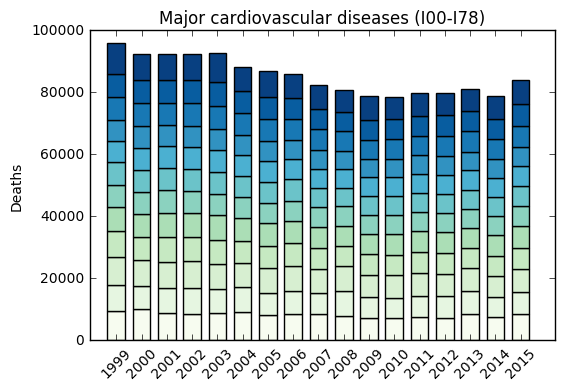

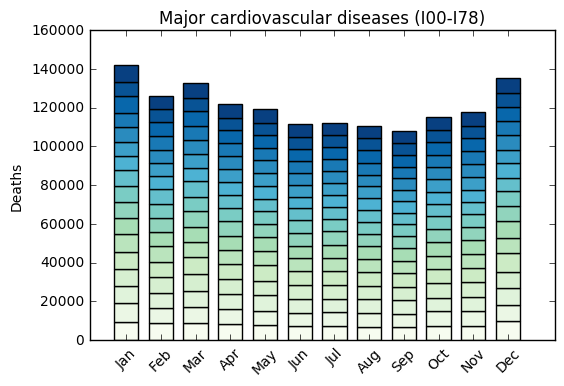

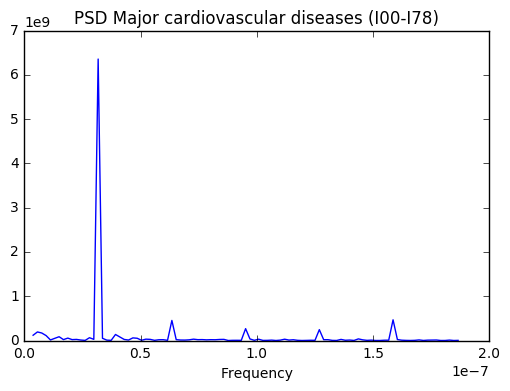

365.0 days
GR113-054


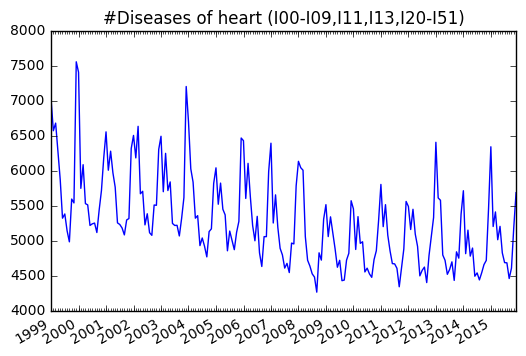

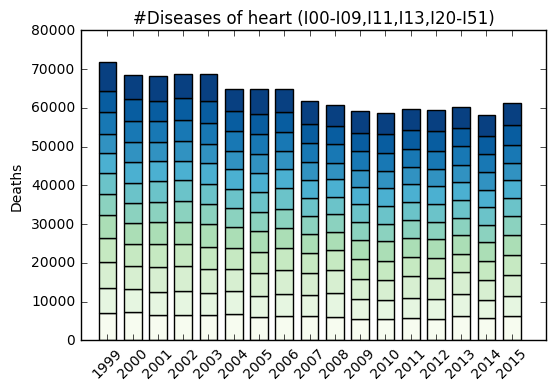

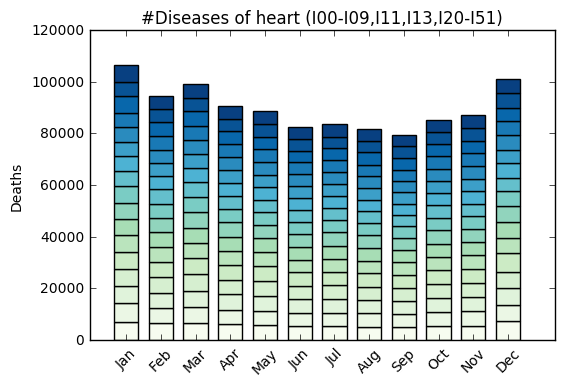

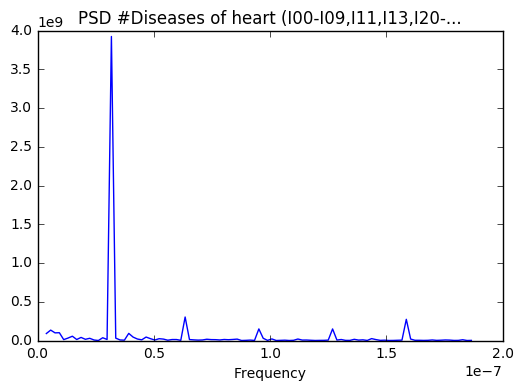

365.0 days
GR113-055


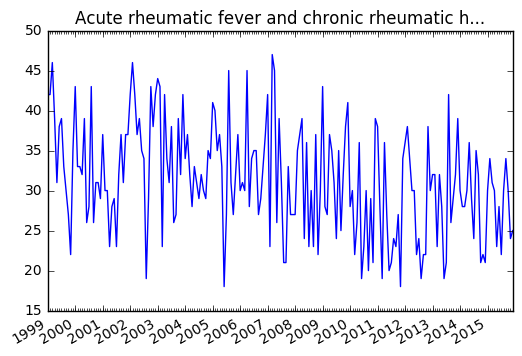

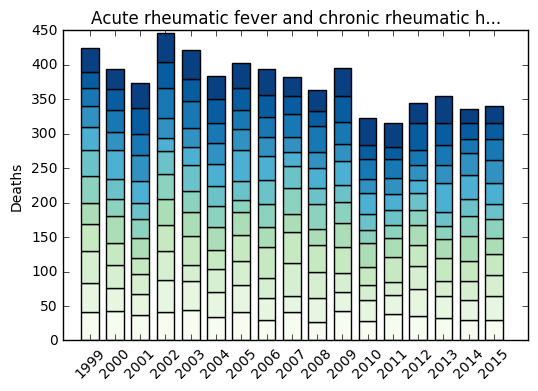

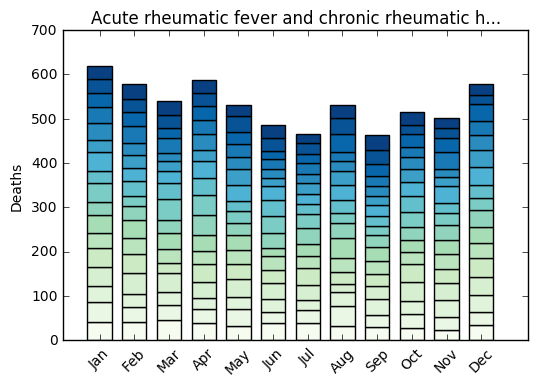

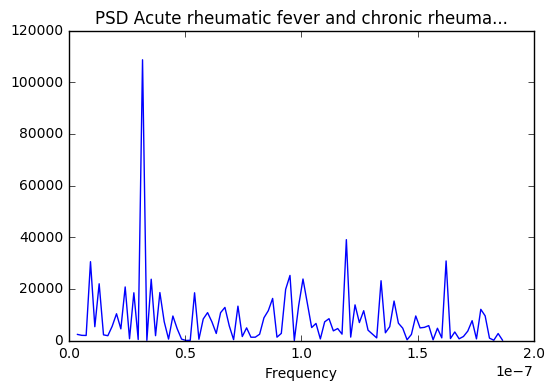

365.0 days
GR113-056


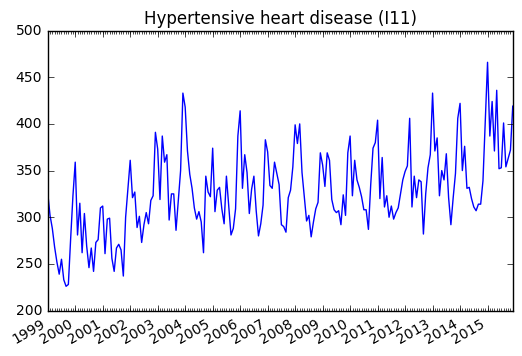

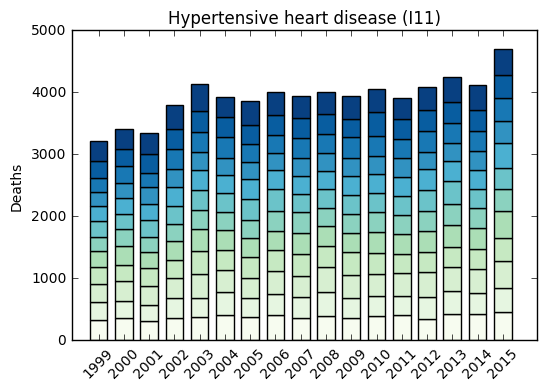

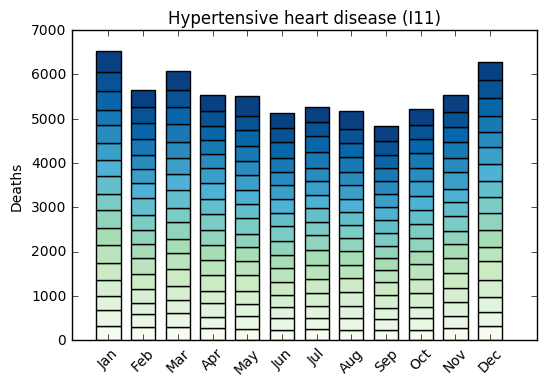

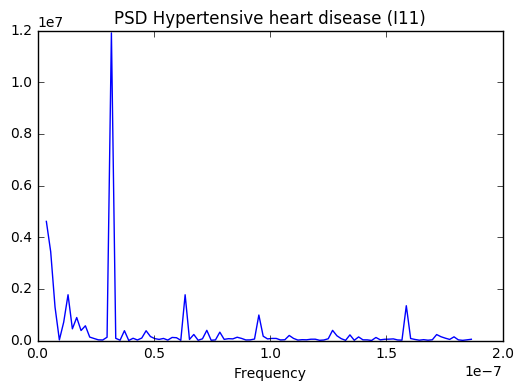

365.0 days
GR113-057


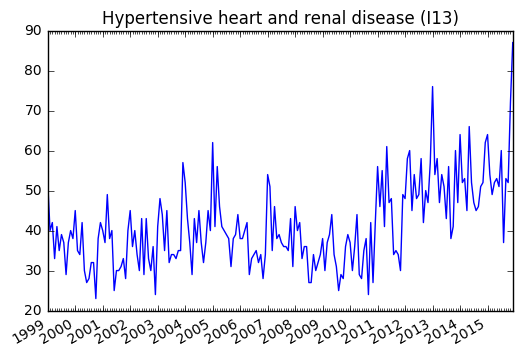

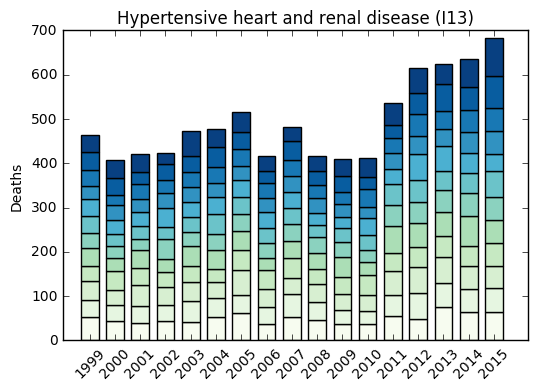

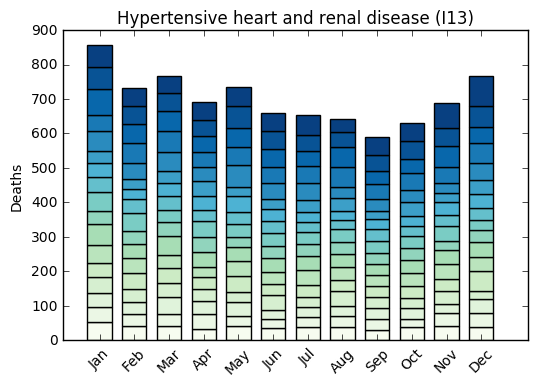

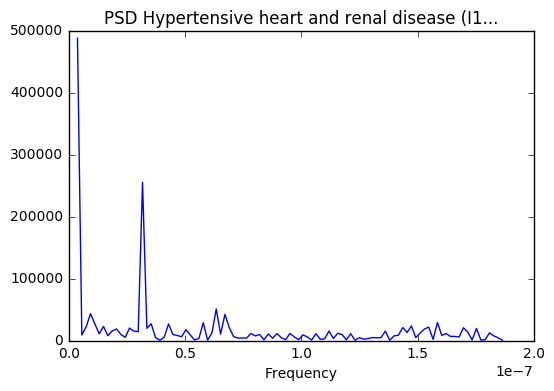

365.0 days
GR113-058


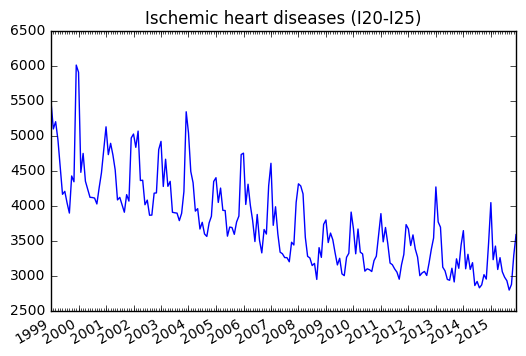

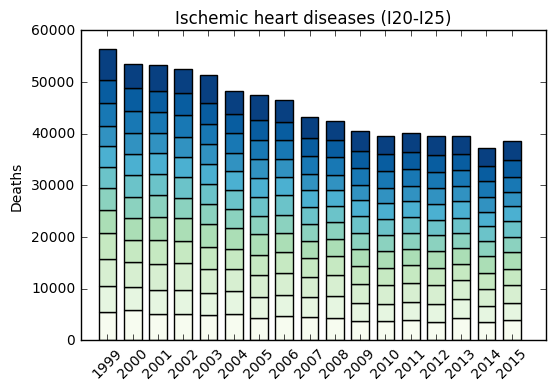

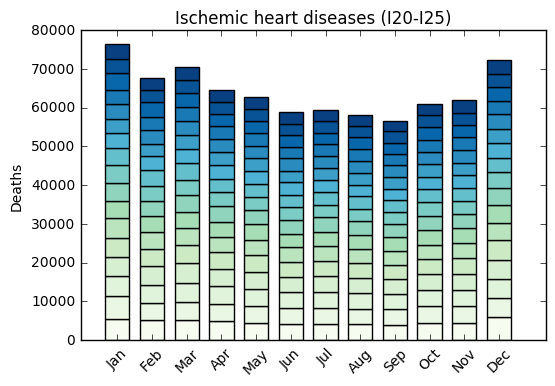

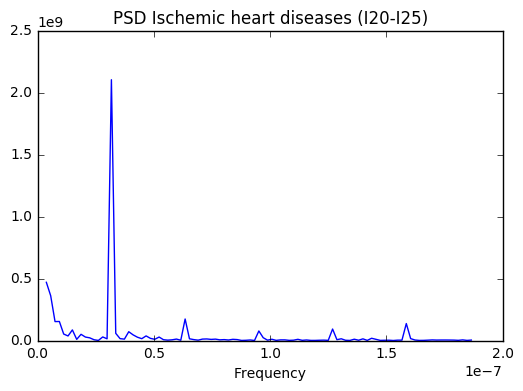

365.0 days
GR113-059


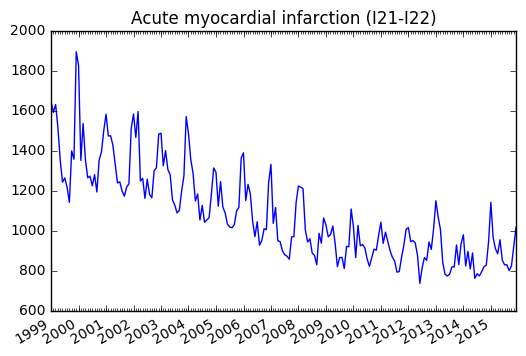

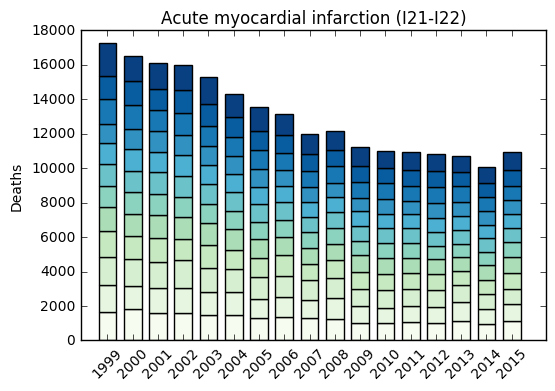

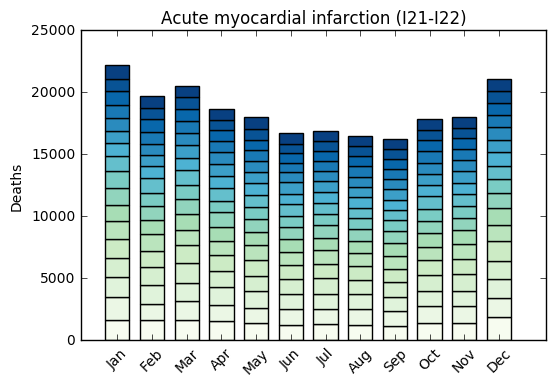

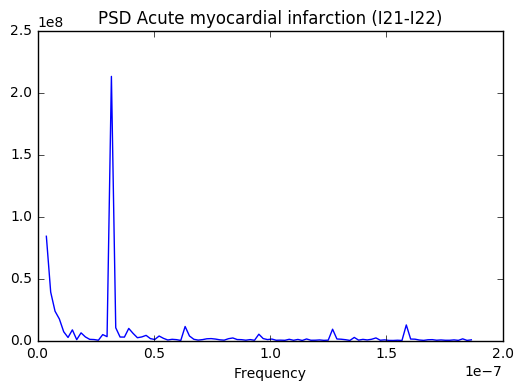

365.0 days
GR113-060


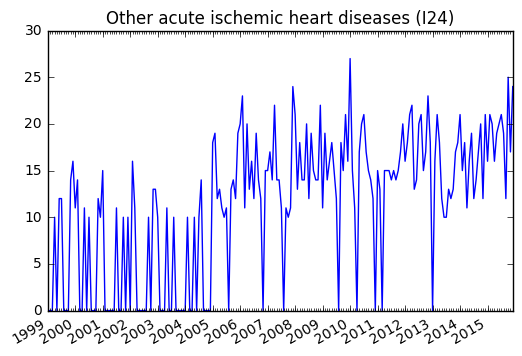

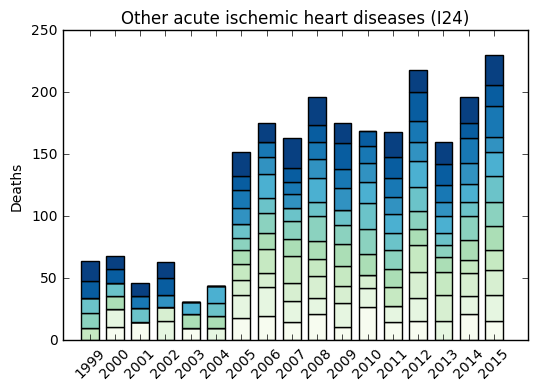

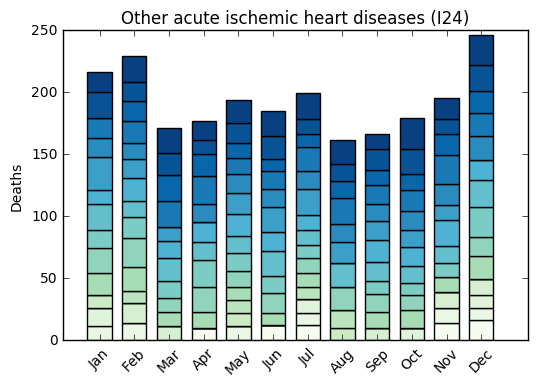

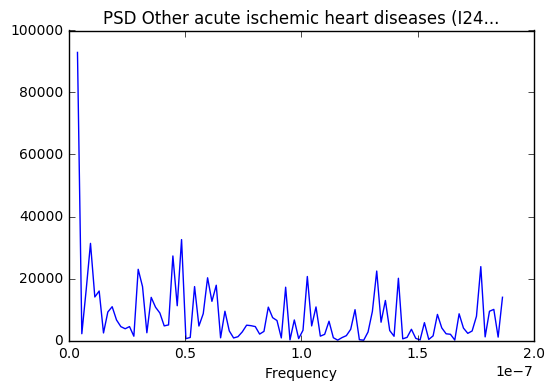

258.541666667 days
GR113-061


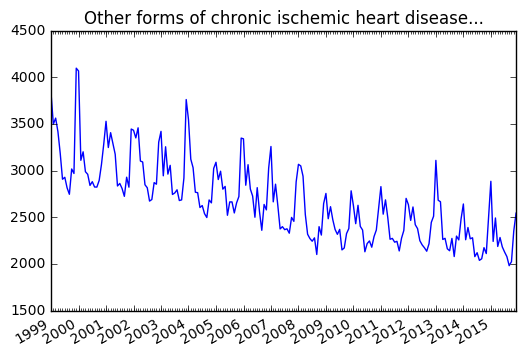

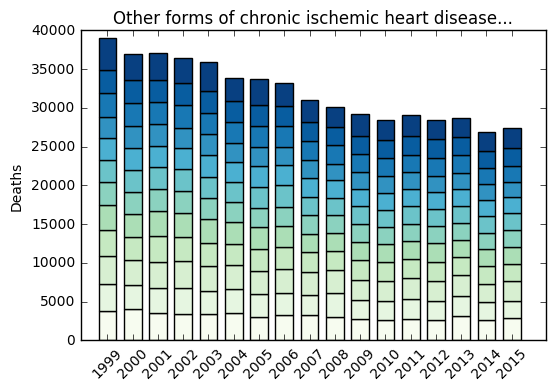

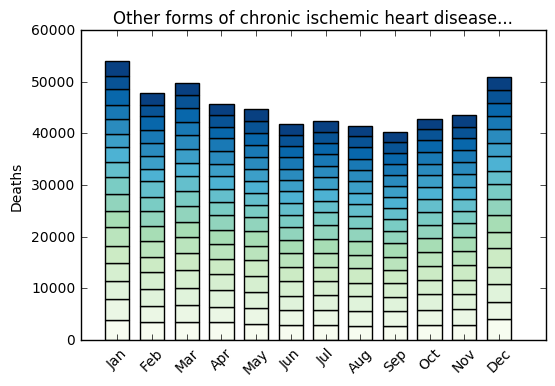

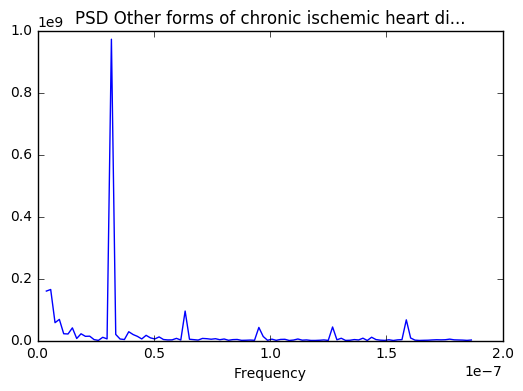

365.0 days
GR113-062


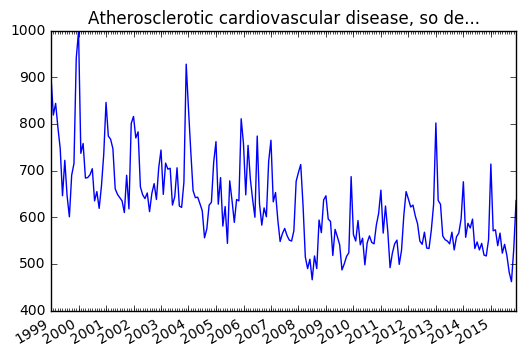

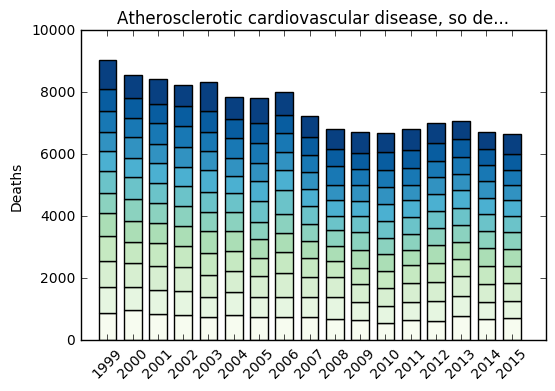

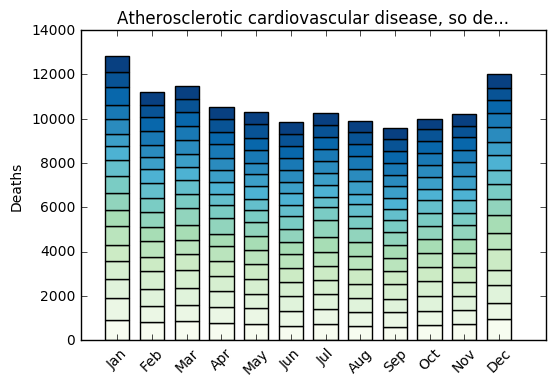

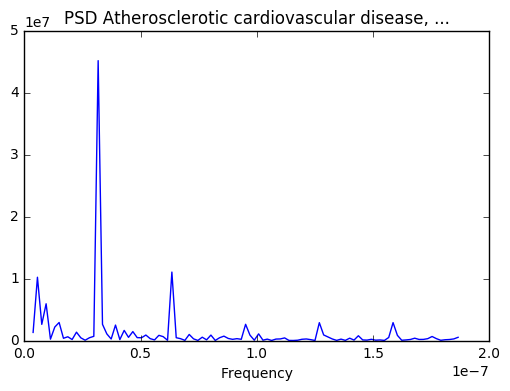

365.0 days
GR113-063


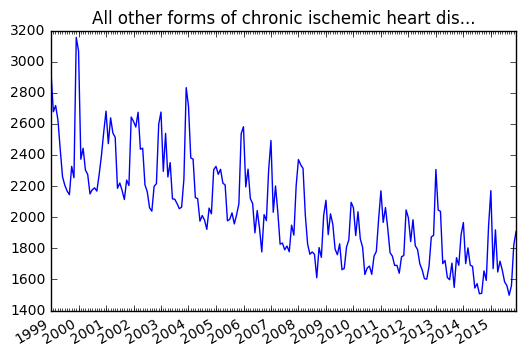

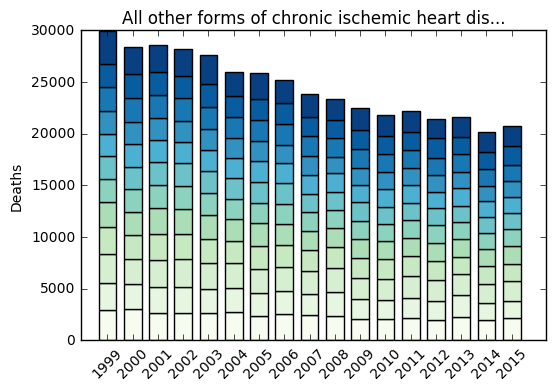

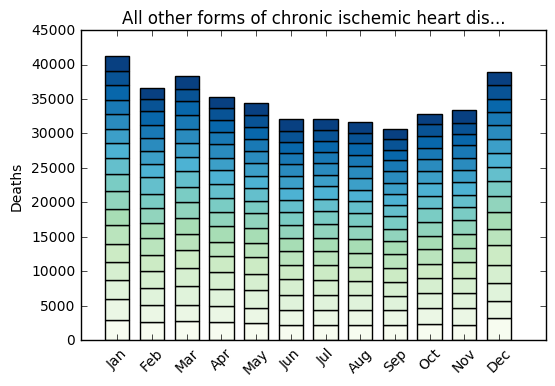

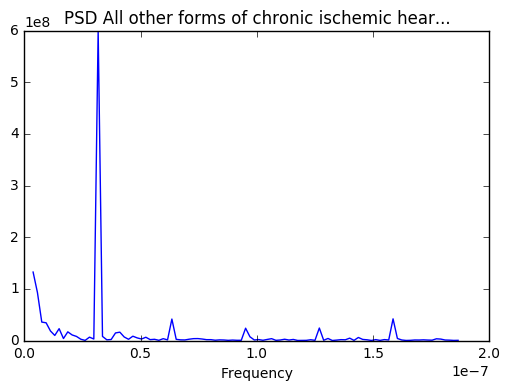

365.0 days
GR113-064


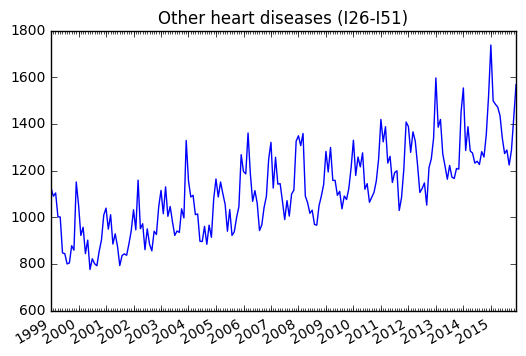

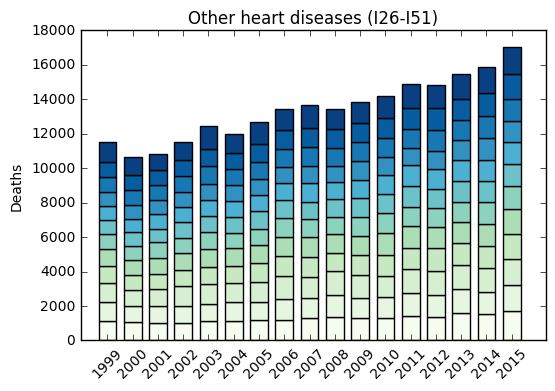

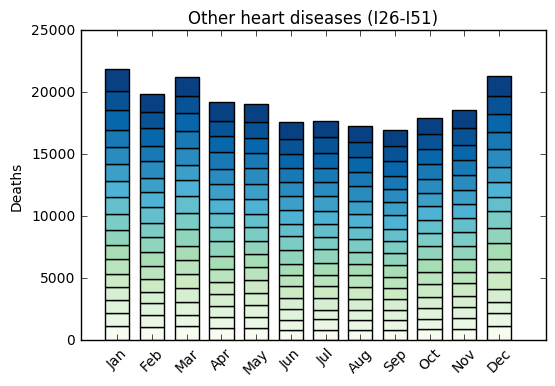

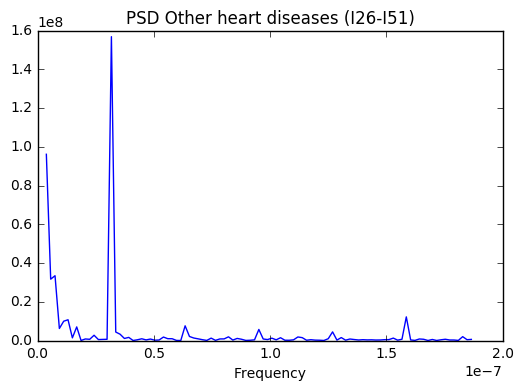

365.0 days
GR113-065


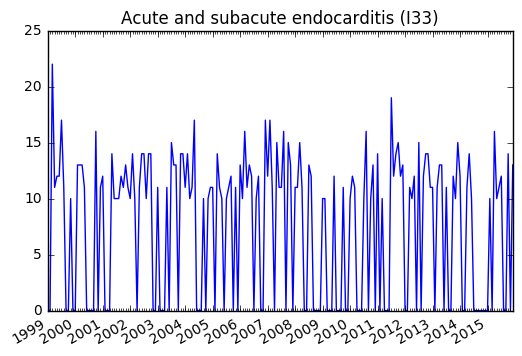

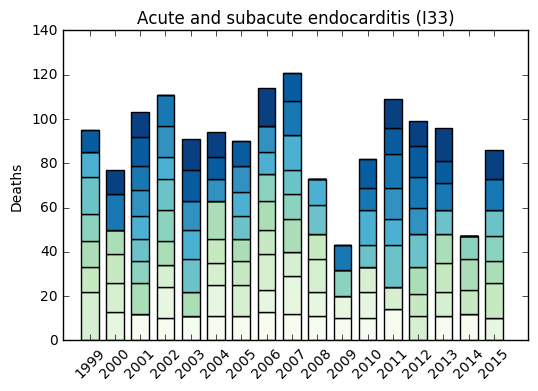

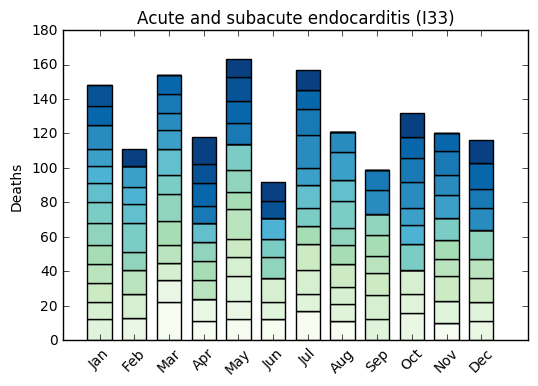

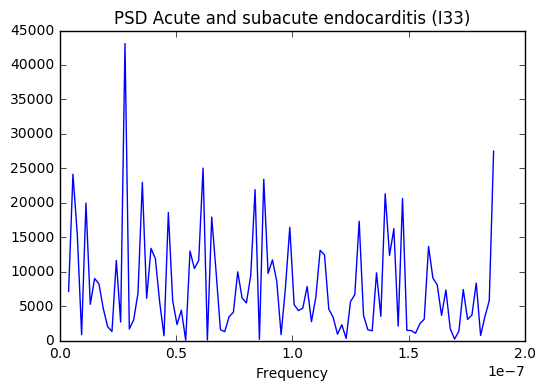

132.021276596 days
GR113-066


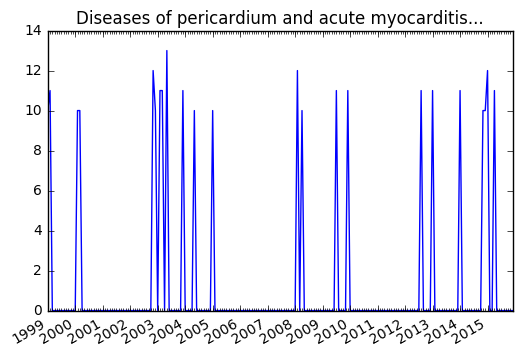

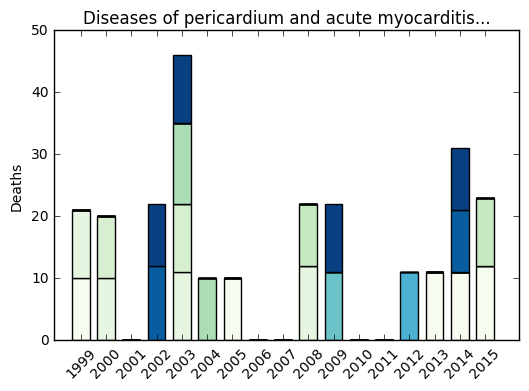

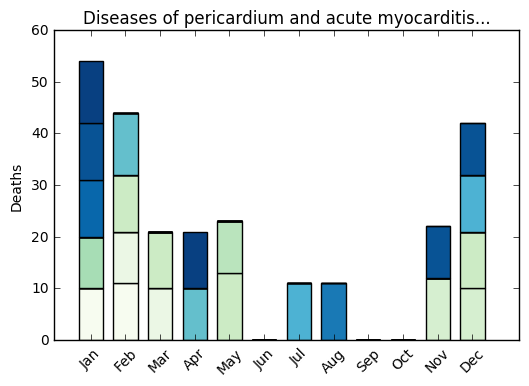

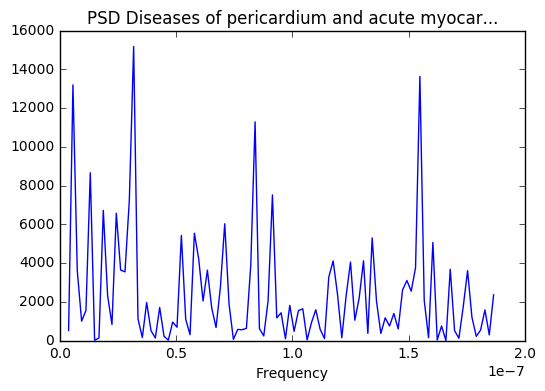

365.0 days
GR113-067


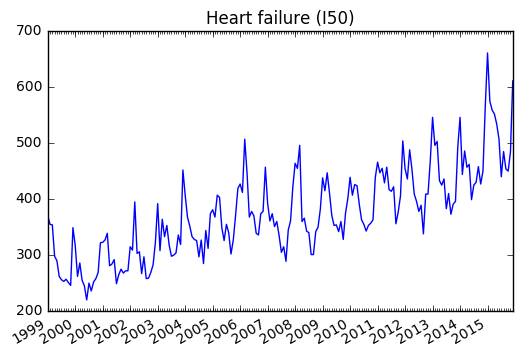

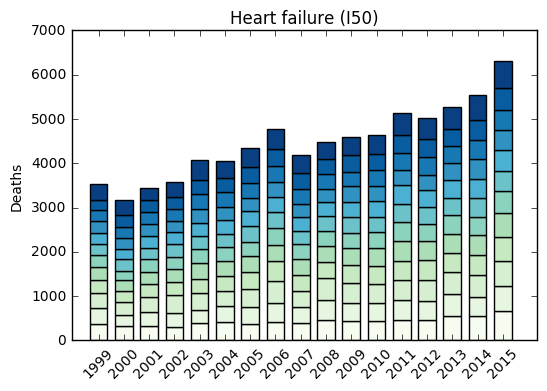

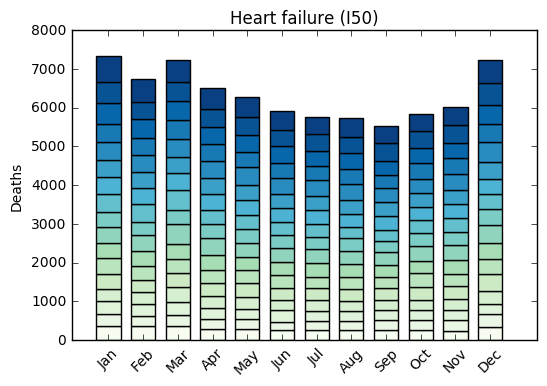

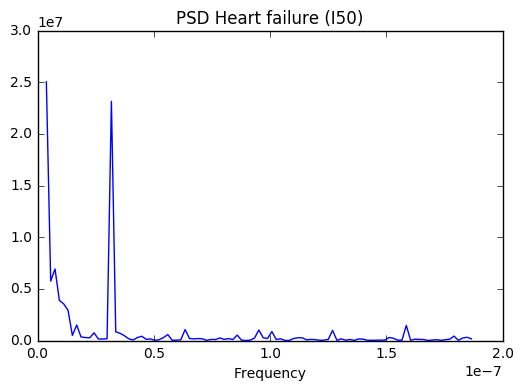

365.0 days
GR113-068


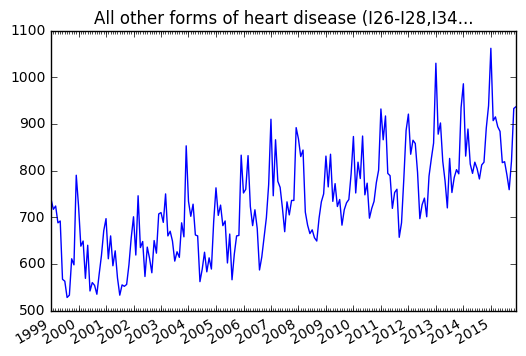

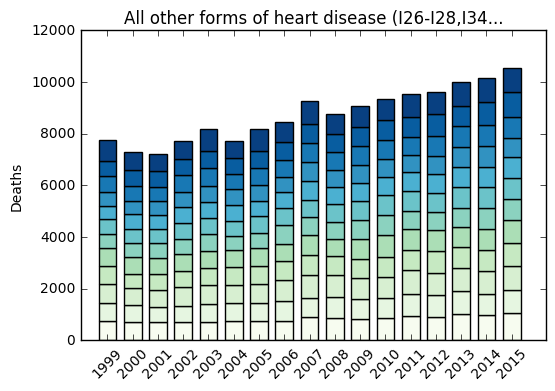

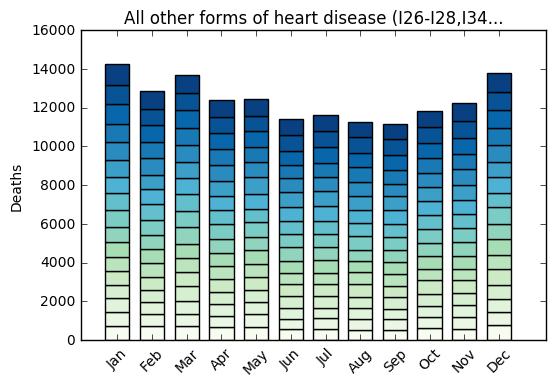

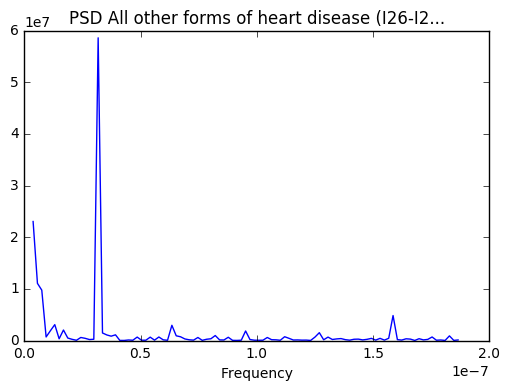

365.0 days
GR113-069


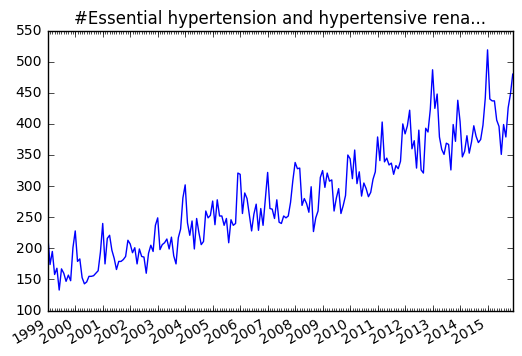

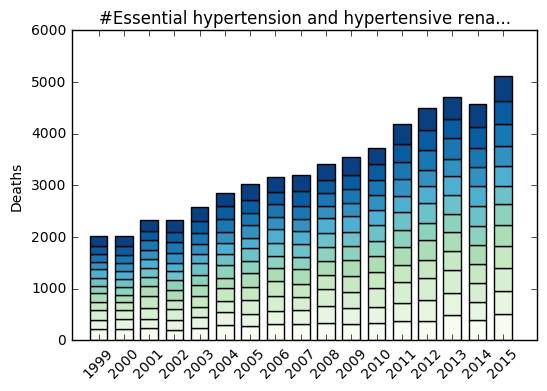

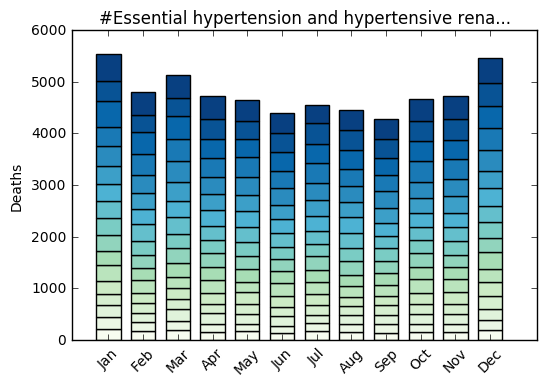

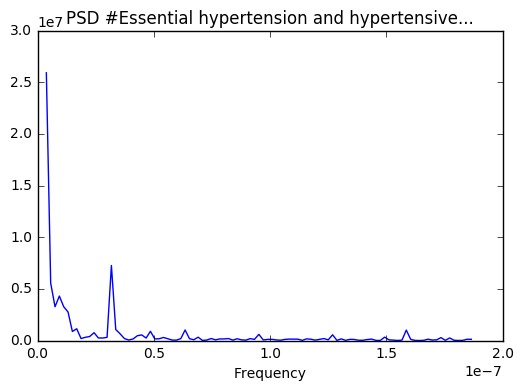

365.0 days
GR113-070


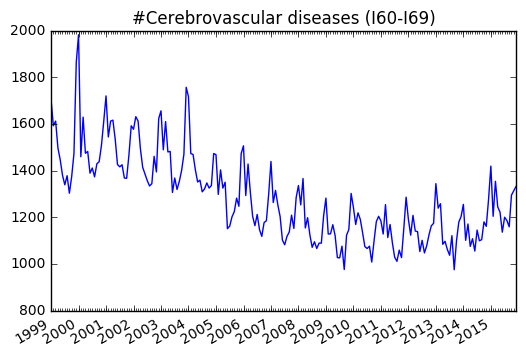

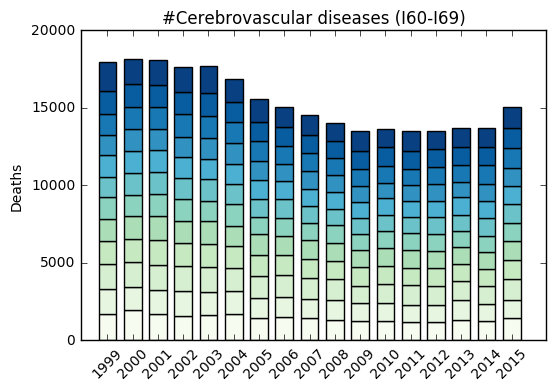

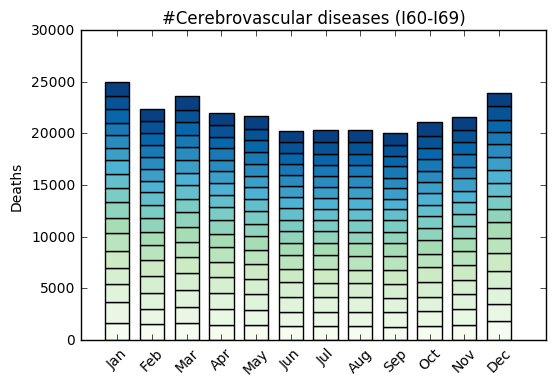

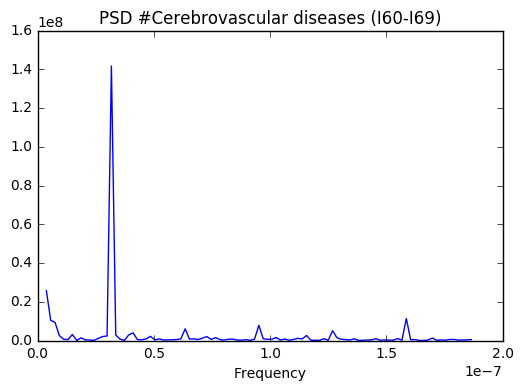

365.0 days
GR113-071


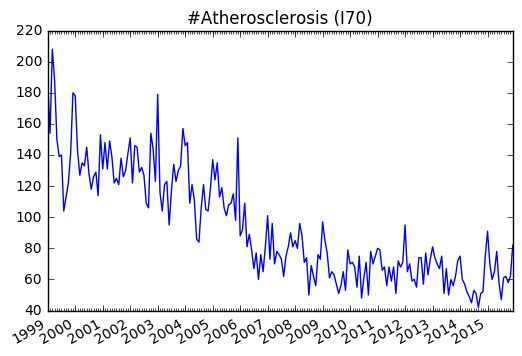

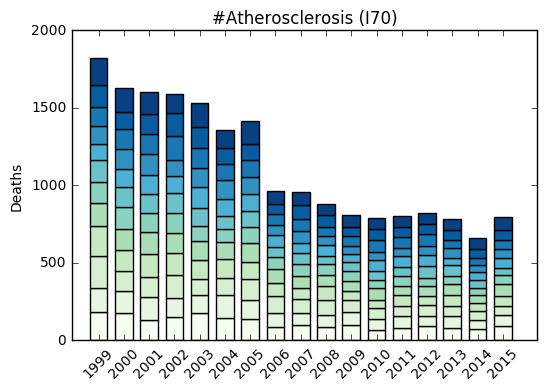

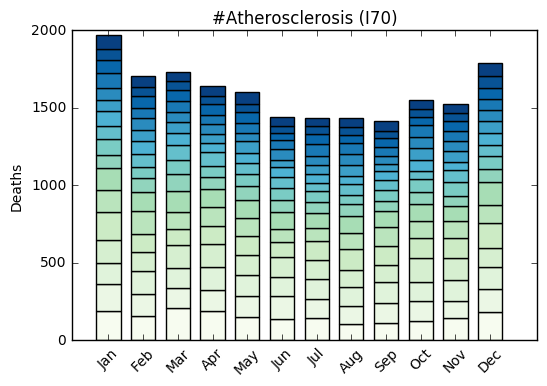

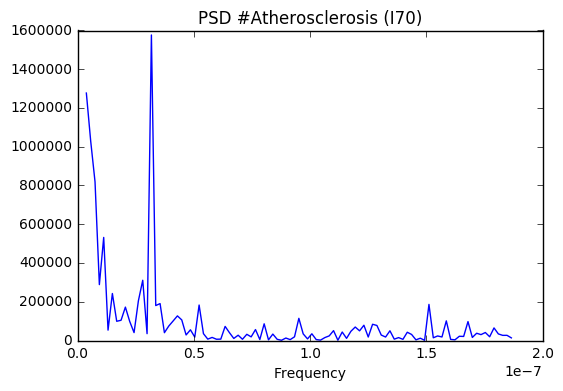

365.0 days
GR113-072


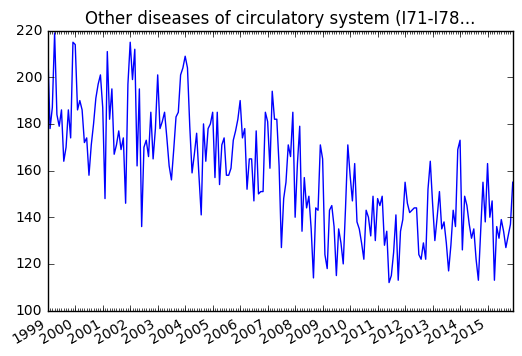

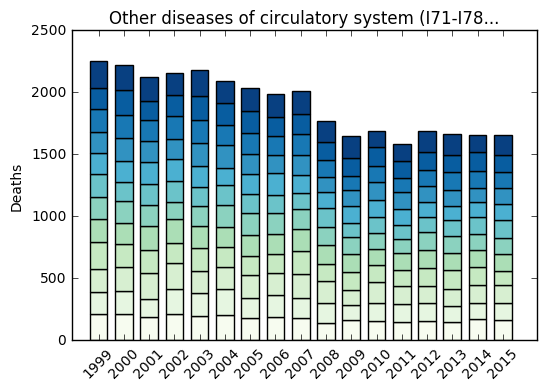

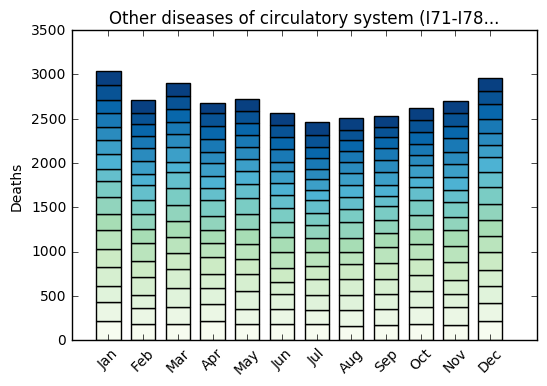

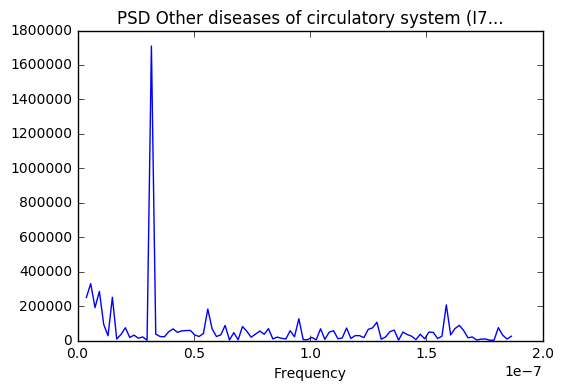

365.0 days
GR113-073


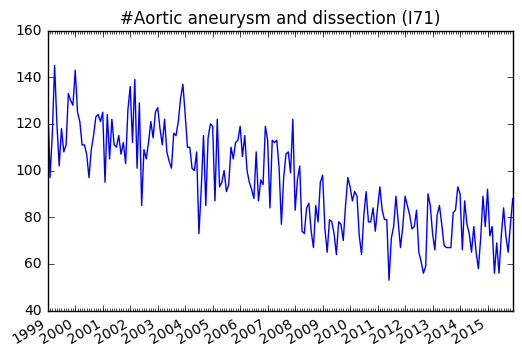

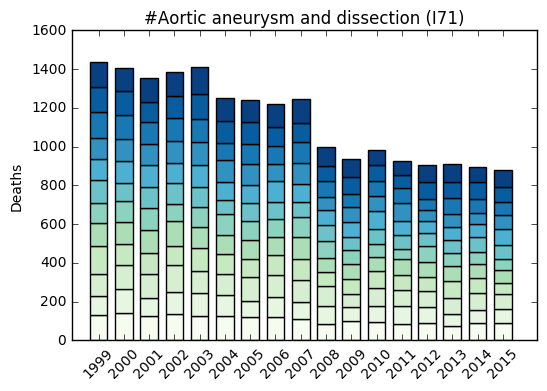

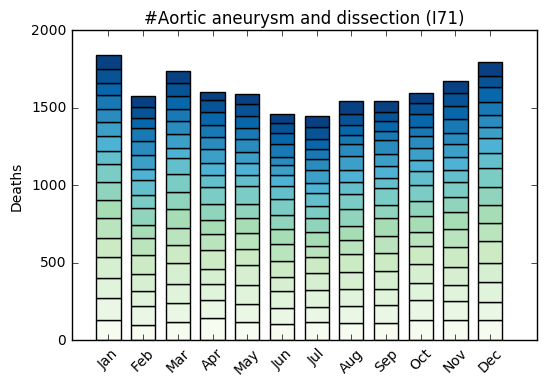

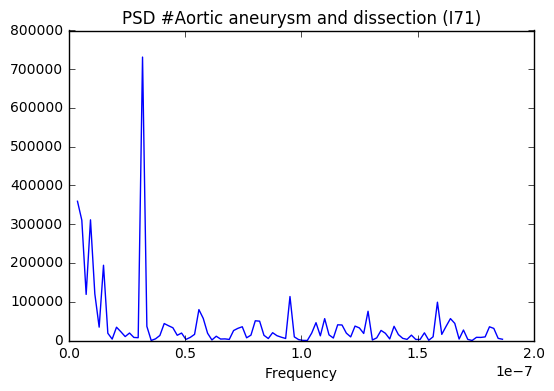

365.0 days
GR113-074


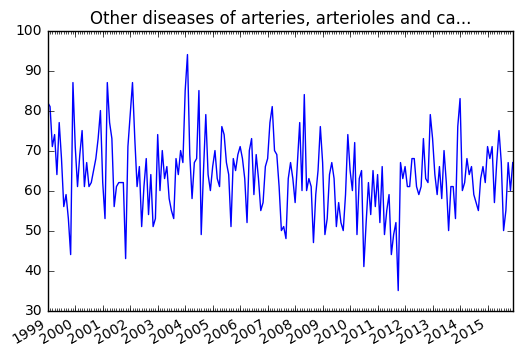

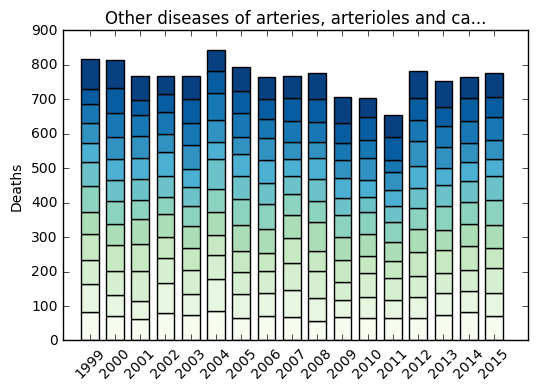

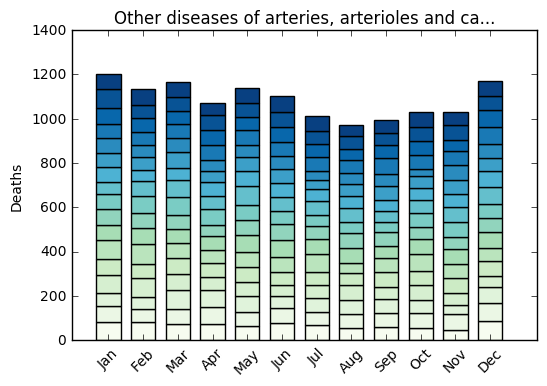

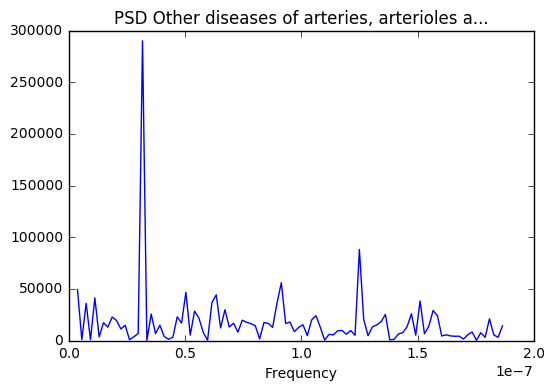

365.0 days
GR113-075


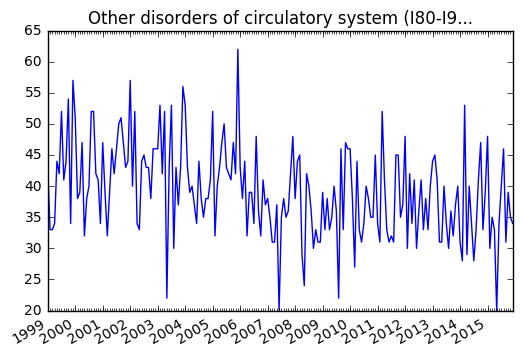

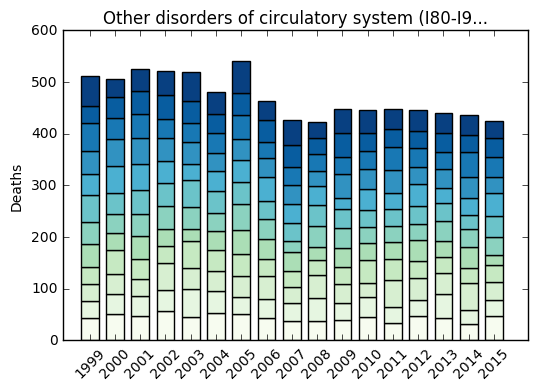

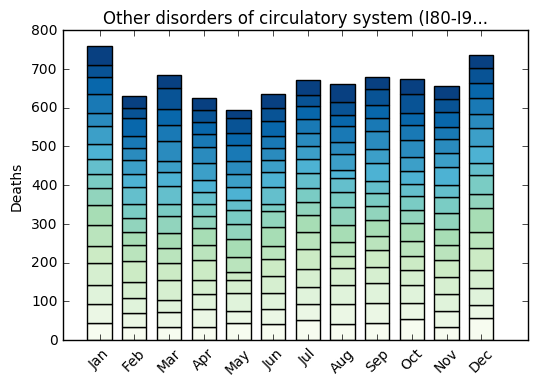

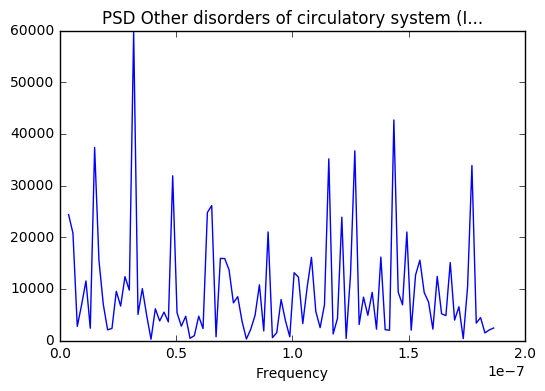

238.653846154 days
['GR113-053', 'GR113-054', 'GR113-055', 'GR113-056', 'GR113-057', 'GR113-058', 'GR113-059', 'GR113-061', 'GR113-062', 'GR113-063', 'GR113-064', 'GR113-066', 'GR113-067', 'GR113-068', 'GR113-069', 'GR113-070', 'GR113-071', 'GR113-072', 'GR113-073', 'GR113-074']


In [307]:
#plot all the functions
def makePlots(df, code):
    makeTplot(df, code)
    createYearChart(df, code)
    createMonthChart(df, code)
    return PSDplot(df, code)

#looping through all the codes that correspond with heart disease
out = []
for i in range(53,76):
    code = 'GR113-0'+str(i)
    print(code)
    temp = makePlots(df, code)
    if temp ==365: #if periodic over a year add to list
        out.append(code)
    
print(out) #list of heart disease codes that have periodicity
    

In [308]:
#print codes and descriptions of periodic heart diseases
for code in out:
    print(code, codeD[code])


('GR113-053', 'Major cardiovascular diseases (I00-I78)')
('GR113-054', '#Diseases of heart (I00-I09,I11,I13,I20-I51)')
('GR113-055', 'Acute rheumatic fever and chronic rheumatic heart diseases (I00-I09)')
('GR113-056', 'Hypertensive heart disease (I11)')
('GR113-057', 'Hypertensive heart and renal disease (I13)')
('GR113-058', 'Ischemic heart diseases (I20-I25)')
('GR113-059', 'Acute myocardial infarction (I21-I22)')
('GR113-061', 'Other forms of chronic ischemic heart disease (I20,I25)')
('GR113-062', 'Atherosclerotic cardiovascular disease, so described (I25.0)')
('GR113-063', 'All other forms of chronic ischemic heart disease (I20,I25.1-I25.9)')
('GR113-064', 'Other heart diseases (I26-I51)')
('GR113-066', 'Diseases of pericardium and acute myocarditis (I30-I31,I40)')
('GR113-067', 'Heart failure (I50)')
('GR113-068', 'All other forms of heart disease (I26-I28,I34-I38,I42-I49,I51)')
('GR113-069', '#Essential hypertension and hypertensive renal disease (I10,I12,I15)')
('GR113-070', '

In [309]:
#which one's aren't periodic?
notOut = ['GR113-060','GR113-065','GR113-075']
for code in notOut:
    print(code, codeD[code])

print(20.0/23.0*100) #percentage codes not periodic; Not a useful number because many are grouped together.

('GR113-060', 'Other acute ischemic heart diseases (I24)')
('GR113-065', 'Acute and subacute endocarditis (I33)')
('GR113-075', 'Other disorders of circulatory system (I80-I99)')
86.9565217391
